### １０年間の日付ごとの平均気温

In [3]:
import pandas as pd

# pandasでcsvを読み込む
df = pd.read_csv('kion10y.csv', encoding='utf-8')

# 日付ごとに気温をリストにまとめる
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(m) + '/' + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))

1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13 : 6.618181818181818
2/14 : 8.081818181818184
2/15 : 7.5909090909090

#### 日付指定

In [4]:
avs['10/10']

20.372727272727275

### 各月の平均気温

月
1      6.022255
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


/Users/masahiro/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/masahiro/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 26376 missing from current font.
  font.load_char(ord(s), flags=flags)


<function matplotlib.pyplot.show(*args, **kw)>

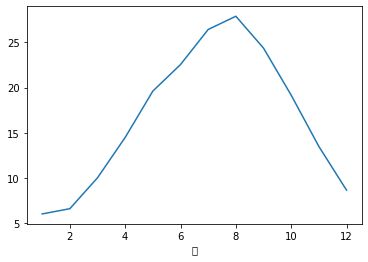

In [5]:
import matplotlib.pyplot as plt

# 月ごとに平均を求める
g = df.groupby(['月'])['気温']
gg = g.sum() / g.count()

# 結果を出力
print(gg)
gg.plot()
plt.savefig('tenki-heikin-tuki.png')
plt.show

### 各年の気温が３０度ごえだった日数

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


/Users/masahiro/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/masahiro/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 24180 missing from current font.
  font.load_char(ord(s), flags=flags)


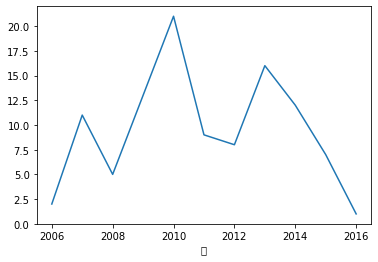

In [6]:
# 30度超えのデータを調べる
atuis = (df['気温'] > 30)

# データを抜き出す
atui = df[atuis]

# 年ごとにカウント
cnt = atui.groupby(["年"])["年"].count()

# 出力
print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

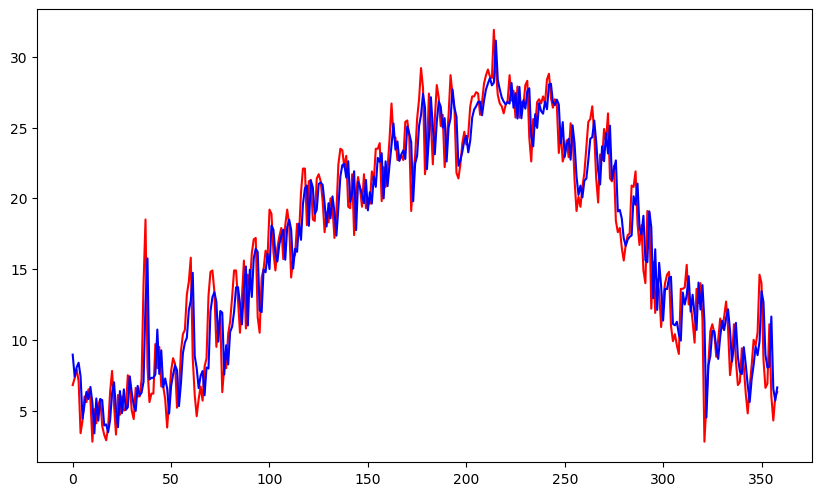

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# データ学習用とテスト用に分割
train_year = (df['年'] <= 2015)
test_year = (df['年'] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成
def make_data(data):
    x = []  # 学習データ
    y = []  # 結果
    temps = list(data['気温'])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return(x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

#### 結果を評価

In [8]:
pre_y - test_y

array([ 2.15008659,  0.10093035,  0.14956569,  1.27995377,  4.01154776,
        0.13402602, -0.5723599 ,  0.72447915, -0.68382634,  0.86899847,
        2.75846115, -1.71149827,  1.75451194, -1.11391497,  0.00873673,
        1.83493122,  0.64795284,  1.12282236, -0.32841783, -1.98114522,
       -1.58167877,  1.59663963,  1.72392646, -2.27467215,  1.67819591,
       -1.18684908,  1.4965541 , -0.05376838, -2.26220765,  0.71957781,
        1.27747391,  0.98006326, -1.6327507 ,  0.74412607,  0.06259502,
       -0.93212045, -6.95227494, -5.94155677,  7.65060819,  1.5931064 ,
        1.11126609,  1.11460513, -2.14838274,  2.72231196, -1.90961361,
        2.55477763, -0.06178402,  1.47000962,  2.7524795 , -1.01480603,
       -1.07441056, -1.15897439, -0.11290773,  2.66463971, -0.98901918,
       -2.28029936, -1.3465706 , -0.89898284, -3.06169713, -2.0065197 ,
       -3.03747745,  6.03146336,  2.75124096,  3.40260359,  0.78322591,
        0.75608291,  2.09342478, -2.02297323, -0.6605326 , -5.13

#### 誤差確認

In [9]:
diff_y = abs(pre_y - test_y)
print('average=', sum(diff_y) / len(diff_y))
print('max=', max(diff_y))

average= 1.6684357122941122
max= 8.470536905560415
